In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

Data Discovery:

In [ ]:
dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Check dimensions of dataframe
dataset.shape

(400, 5)

In [ ]:
# Check number of null values. We see there are no null values
dataset.isnull().sum().to_frame()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
# Check datatypes
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Data Processing:

In [3]:
#the key "gender" variable is object, let's convert it to a numerical value: 'Male' to 0 and 'Female' to 1
dataset['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
#dropping the id column (non-significant) of the dataset
dataset.drop(columns=['User ID'], inplace=True)
#checking the dataset after modification
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [4]:
# Selecting features
X = dataset.iloc[:, [0, 1, 2]].values
X[0:10]

array([[     0,     19,  19000],
       [     0,     35,  20000],
       [     1,     26,  43000],
       [     1,     27,  57000],
       [     0,     19,  76000],
       [     0,     27,  58000],
       [     1,     27,  84000],
       [     1,     32, 150000],
       [     0,     25,  33000],
       [     1,     35,  65000]])

In [5]:
#Selecting the target
y = dataset.iloc[:, 3].values          # Target: Purchased
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)            # La standardisation transforme les valeurs tq elles aient une moyenne de 0 et un écart type de 1
X[0:5]

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       [ 0.98019606, -1.01769239, -0.37418169],
       [-1.02020406, -1.78179743,  0.18375059]])

In [7]:
# Splitting the dataset into the Training set and Test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (320, 3) (320,)
Test set: (80, 3) (80,)


 KNN classification:

In [8]:
#recherche du meilleur paramètre k pour l'algorithme KNN en utilisant la validation croisée pour trouver la meuilleur performance.
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
best_score = 0.0        #stocker le meilleur score de validation croisée trouvé
acc_list=[]   #liste vide pour stocker les scores de validation croisée pour différents valeurs de k
for k in range(3,15):

    clf_knn = KNeighborsClassifier(n_neighbors = k, algorithm='auto')

    # using 10-fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score = scores.mean()
    acc_list.append(score)

    if score > best_score:
        best_score=score
        best_clf = clf_knn
        best_k = k

print("Best K is :",best_k,"| Cross validation Accuracy :",best_score)
clf_knn = best_clf

Best K is : 10 | Cross validation Accuracy : 0.9099999999999999


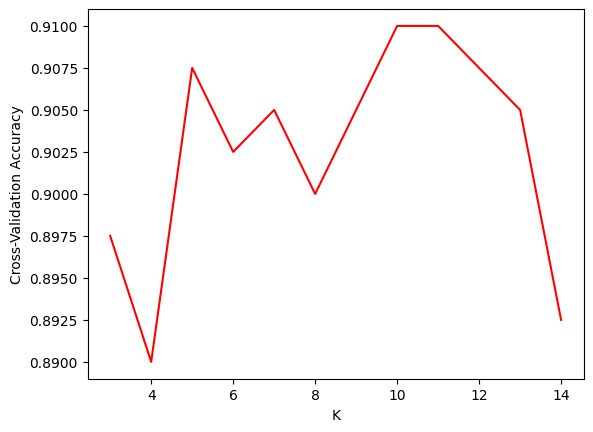

In [ ]:
# Plot accuracy of various K values.
plt.plot(range(3,15),acc_list, c="r")
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()


In [9]:
# Train KNN model using our algorithm above with optimal value of K of 10
clf_knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [10]:
# Make predictions on test set using our model
y_hat_knn = clf_knn.predict(X_test)   # utilise le modèle KNN pour faire des prédictions sur l'ensemble de test (X_test)
y_hat_knn[0:10]   # affiche les dix premières prédictions faites par le modèle KNN

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

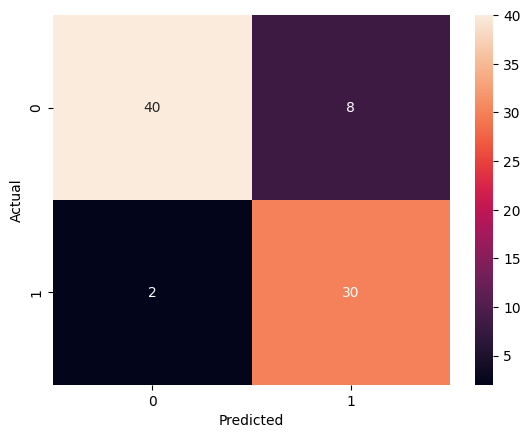

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        48
           1       0.79      0.94      0.86        32

    accuracy                           0.88        80
   macro avg       0.87      0.89      0.87        80
weighted avg       0.89      0.88      0.88        80

0.875


In [11]:
#Evaluating the Model:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_knn,labels=[0,1])
import seaborn as sns
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_knn))
#Calcul de accuracy
accuracy_knn = accuracy_score(y_test, y_hat_knn)
print(accuracy_knn)


SVM classification:

In [12]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Initialize SVM classifier
clf_svm = SVC(kernel='linear')

In [13]:
# Train the SVM classifier
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
# Make predictions on test set using SVM classifier
y_hat_svm = clf_svm.predict(X_test)
y_hat_svm[0:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

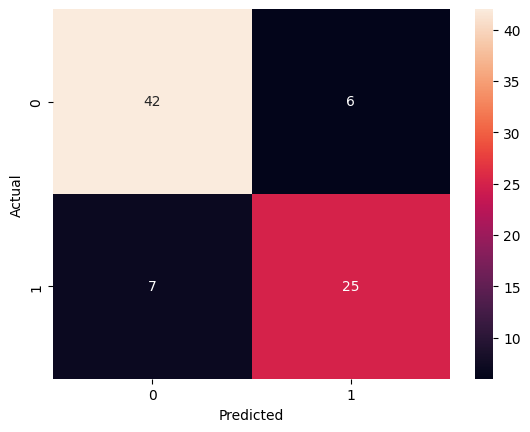

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.81      0.78      0.79        32

    accuracy                           0.84        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80

0.8375


In [15]:
#Evaluation:
# Calculate confusion matrix for SVM classifier
cm_svm = confusion_matrix(y_test, y_hat_svm, labels=[0,1])
# Plot heatmap of confusion matrix for SVM classifier
sns.heatmap(cm_svm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.metrics import accuracy_score
# Confusion matrix report for SVM classifier
print(classification_report(y_test, y_hat_svm))
accuracy_svm = accuracy_score(y_test, y_hat_svm)
print(accuracy_svm)


Naive Bayes Classification:

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Naive Bayes classifier
clf_nb = GaussianNB()

In [17]:
# Train the Naive Bayes classifier
clf_nb.fit(X_train, y_train)


GaussianNB()

In [18]:
# Make predictions on test set using Naive Bayes classifier
y_hat_nb = clf_nb.predict(X_test)
y_hat_nb[0:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

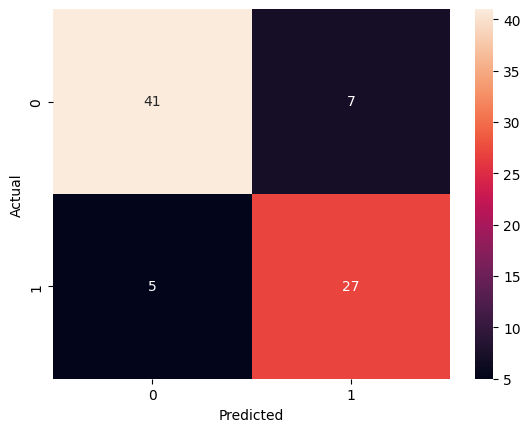

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.79      0.84      0.82        32

    accuracy                           0.85        80
   macro avg       0.84      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80

0.85


In [19]:
#Evaluation
# Calculate confusion matrix for Naive Bayes classifier
cm_nb = confusion_matrix(y_test, y_hat_nb, labels=[0, 1])
# Plot heatmap of confusion matrix for Naive Bayes classifier
sns.heatmap(cm_nb, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix report for Naive Bayes classifier
print(classification_report(y_test, y_hat_nb))
accuracy_nb = accuracy_score(y_test, y_hat_nb)
print(accuracy_nb)

Comparasion of Used metrics :

In [20]:
from prettytable import PrettyTable

# Define metrics and values for each algorithm
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values_knn = [0.95, 0.83, 0.89, 0.875]
values_nb = [0.89, 0.85, 0.87, 0.85]
values_svm = [0.86, 0.88, 0.87, 0.8375]

# Create the comparative table
table = PrettyTable()
table.field_names = ['Algorithm'] + metrics
table.add_row(['KNN'] + values_knn)
table.add_row(['Naive Bayes'] + values_nb)
table.add_row(['SVM'] + values_svm)

# Print the table
print(table)

+-------------+-----------+--------+----------+----------+
|  Algorithm  | Precision | Recall | F1-Score | Accuracy |
+-------------+-----------+--------+----------+----------+
|     KNN     |    0.95   |  0.83  |   0.89   |  0.875   |
| Naive Bayes |    0.89   |  0.85  |   0.87   |   0.85   |
|     SVM     |    0.86   |  0.88  |   0.87   |  0.8375  |
+-------------+-----------+--------+----------+----------+


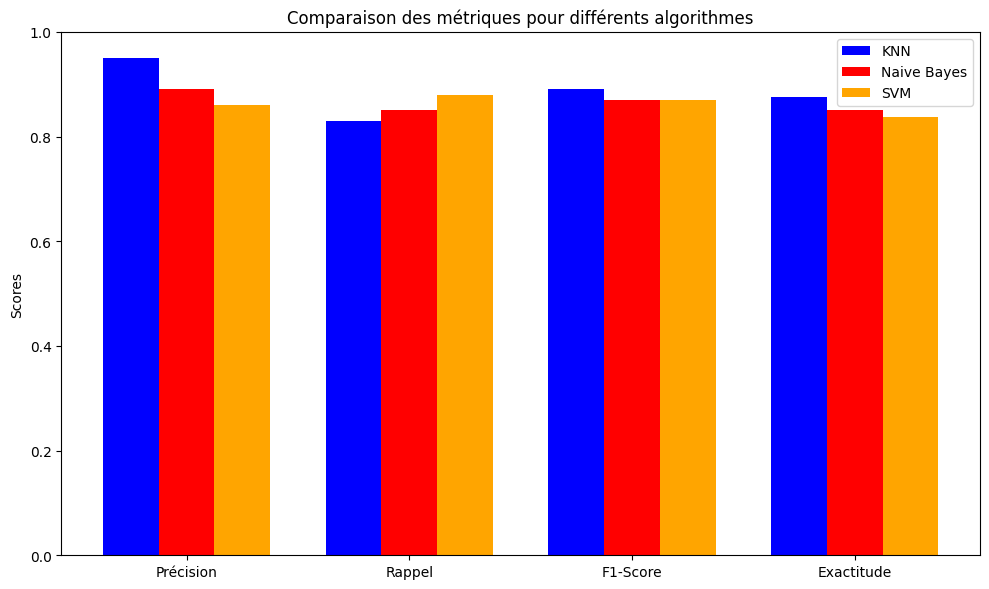

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les métriques et les valeurs pour chaque algorithme
metrics = ['Précision', 'Rappel', 'F1-Score', 'Exactitude']
values_knn = [0.95, 0.83, 0.89, 0.875]
values_nb = [0.89, 0.85, 0.87, 0.85]
values_svm = [0.86, 0.88, 0.87, 0.8375]

# Créer les positions sur l'axe des x pour les barres
x = np.arange(len(metrics))

# Définir la largeur des barres
bar_width = 0.25  # Largeur des barres

# Créer les sous-graphiques
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer les barres pour chaque algorithme
ax.bar(x - bar_width, values_knn, bar_width, label='KNN', color='blue')
ax.bar(x, values_nb, bar_width, label='Naive Bayes', color='red')
ax.bar(x + bar_width, values_svm, bar_width, label='SVM', color='orange')

# Personnaliser le graphique
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
ax.set_title('Comparaison des métriques pour différents algorithmes')
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()
